In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
import georasters as gr
import pyproj

C:\Users\Gebruiker\anaconda3\envs\geo_env\lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
C:\Users\Gebruiker\anaconda3\envs\geo_env\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [ ]:
# tiff5 = './assets/DHMVIIDSMRAS1m_k05.tif'
# tiff12 = "./assets/DHMVIIDSMRAS1m_k12.tif"
tiff13 = "./assets/DHMVIIDSMRAS1m_k13.tif"


In [ ]:
SHP13 = gpd.read_file('./assets/DHMVIIDSMRAS1m_k13/DHMVII_vdc_k13.shp')

## Geopandas tryout

In [ ]:
SHP13.head()

In [ ]:
type(SHP13)

In [ ]:
SHP13.boundary.plot() #only border info

In [ ]:
SHP13.geometry.plot()


In [ ]:
SHP13.geometry.shape

In [ ]:
SHP13.geometry[2]

In [ ]:
SHP13.crs

## RasterIO

## CREATE RASTERIO DATASET OBJECT

In [ ]:
geo13 = rasterio.open(tiff13)

## Get metadata

In [ ]:
geo13.meta

In [ ]:
geo13.crs

## Get raterio dataset's bounds

In [ ]:
geo13.bounds

In [ ]:
rasterio.plot.show(geo13,cmap='terrain') #to big!


In [ ]:
type(geo13)

In [ ]:
geo13.transform*(0,0)  #upper left coordinates

In [ ]:
geo13.profile


## Reproject from Lambert to lat/lon

In [ ]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [ ]:
dst_crs = 'EPSG:4326'

with rasterio.open('./assets/DHMVIIDSMRAS1m_k13.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('./assets/DHMVIIDSMRAS1m_k13_latlon.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [ ]:
tiff_latlon = rasterio.open("./assets/DHMVIIDSMRAS1m_k13_latlon.tif")

In [ ]:
rasterio.plot.show(geo13_latlon,cmap='terrain')

## window into a smaller part of the Geotiff - lambert

In [ ]:
# import rasterio
# width = 32000  #columns
# height = 20000 #rows
# with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
#     w = src.read(1, window=Window(width/2, height/2, width/6, height/6))

# rasterio.plot.show(w,cmap='terrain')

In [ ]:
type(w)

## window resize from bounding box of Bruges! - lambert

In [ ]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

Bruges_lamb_long = 70151.33
Bruges_lamb_lat = 211744.50

left = Bruges_lamb_long - 1500
right = Bruges_lamb_long + 1500
bottom = Bruges_lamb_lat - 1500
top = Bruges_lamb_lat + 1500

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    
rasterio.plot.show(rst, cmap='bwr')


In [ ]:
type(rst)

In [ ]:
rst.shape

In [ ]:
pandas_window = pd.DataFrame(rst)


In [ ]:
type(pandas_window)

In [ ]:
pandas_window.info

## 3D plot of smaller window with matplotlib - lambert

In [ ]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

Bruges_lamb_long = 70101.33
Bruges_lamb_lat = 211544.50

left = Bruges_lamb_long - 20
right = Bruges_lamb_long + 20
bottom = Bruges_lamb_lat - 20
top = Bruges_lamb_lat + 20

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    
rasterio.plot.show(rst, cmap='bwr')


In [ ]:
df_window = pd.DataFrame(rst)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
x = df_window.index
y = df_window.columns
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = df_window.values

figure = plt.figure(1, figsize = (20, 20))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="bone", linewidth=0.1)
plt.show()

## Plotly 3D plot - lambert

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Surface(x=df_window.index, y=df_window.columns, z=df_window.values, colorscale='twilight' ,showlegend=False)])
fig.update_layout(title='Address', autosize=True)
# fig.update_layout(scene2_aspectmode='manual',
#                   scene2_aspectratio=dict(x=1, y=1, z=2))
# fig.update_layout(aspectmode='auto')
# fig.add_trace(go.Surface(x=x, y=y, z=df_window.values, colorbar_x=-0.07))
fig.show()

## GPS coordinates of Brugge, Belgium. Latitude: 51.2089 Longitude: 3.2242


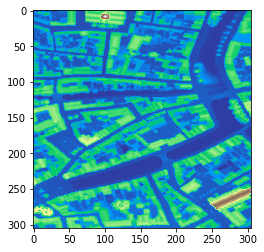

<AxesSubplot:>

In [11]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

Bruges_long = 3.227539
Bruges_lat = 51.212895 

left = Bruges_long - 0.0020
right = Bruges_long + 0.0020
bottom = Bruges_lat - 0.0020
top = Bruges_lat + 0.0020

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13_latlon.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    
rasterio.plot.show(rst, cmap='terrain')

In [12]:
df_lanlon = pd.DataFrame(rst)


In [32]:
import scipy.ndimage
import plotly.graph_objects as go
import numpy as np 
from scipy.interpolate import griddata

sigma = [1, 1]
# print(sigma)
depthSmooth = scipy.ndimage.filters.gaussian_filter(df_lanlon, sigma)

fig = go.Figure(data=[go.Surface(z=depthSmooth, colorscale='twilight' ,showlegend=False)])
fig.update_layout(title='Address', autosize=True)

fig.show()

## GDAL

In [ ]:
# from osgeo import gdal
# import matplotlib.pyplot as plt

# dataset = gdal.Open(tiff12, gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
# band = dataset.GetRasterBand(1)
# arr = band.ReadAsArray()
# plt.imshow(arr)